# Chapter 7: How to Build a Helpful Histogram
For additional context see Chapter 7 of [The Virus of Variation](https://www.brokenquality.com/book). Questions? Email James.Lehner@gmail.com or QualityIsBroken@gmail.com.

In [62]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from process_improvement import comparison_charts as cc
import numpy as np
import seaborn as sns
import pandas as pd
import stemgraphic # For stem-and-leaf plot

import warnings

# Silence warning with histplot
warnings.filterwarnings(
    "ignore",
    message="use_inf_as_na option is deprecated",
    category=FutureWarning
)

%matplotlib inline

## Get the data

The dataset used in this chapter is called:

`death-to-birth-rates-by-hospital-1784-to-1849.csv`

The dataset can be found at https://github.com/jimlehner/the-virus-of-variation/tree/main/data.

In [59]:
# Establish the dataset_url
rate_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/death-to-birth-rates-by-hospital-1784-to-1849.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
rate_df = get_data(rate_url)

# Drop unnecessary columns
rate_df = rate_df.drop('Note', axis=1)

# Specify 'Year' column dtype as string
rate_df['Year'] = rate_df['Year'].astype('string')
rate_df['Hospital'] = rate_df['Hospital'].astype('category')

rate_df_clean = rate_df.copy()
rate_df_clean['Rate'] = rate_df_clean['Rate'].replace([np.inf, -np.inf], np.nan)
rate_df_clean = rate_df_clean.dropna(subset=['Rate'])

# Show dataframe
rate_df.head()

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1784,284,6,2.1
1,Vienna General Hospital,1785,899,13,1.4
2,Vienna General Hospital,1786,1151,5,0.4
3,Vienna General Hospital,1787,1407,5,0.4
4,Vienna General Hospital,1788,1425,5,0.4


In [50]:
# Split dataframe according to hospital
vienna_df = rate_df[rate_df['Hospital'] == 'Vienna General Hospital'].copy()

dublin_df = rate_df[rate_df['Hospital'] == 'Dublin Maternity Hospital'].reset_index(drop=True)

## Figure 7.1: Histogram of death-to-birth rates at Vienna General, 1784 to 1849

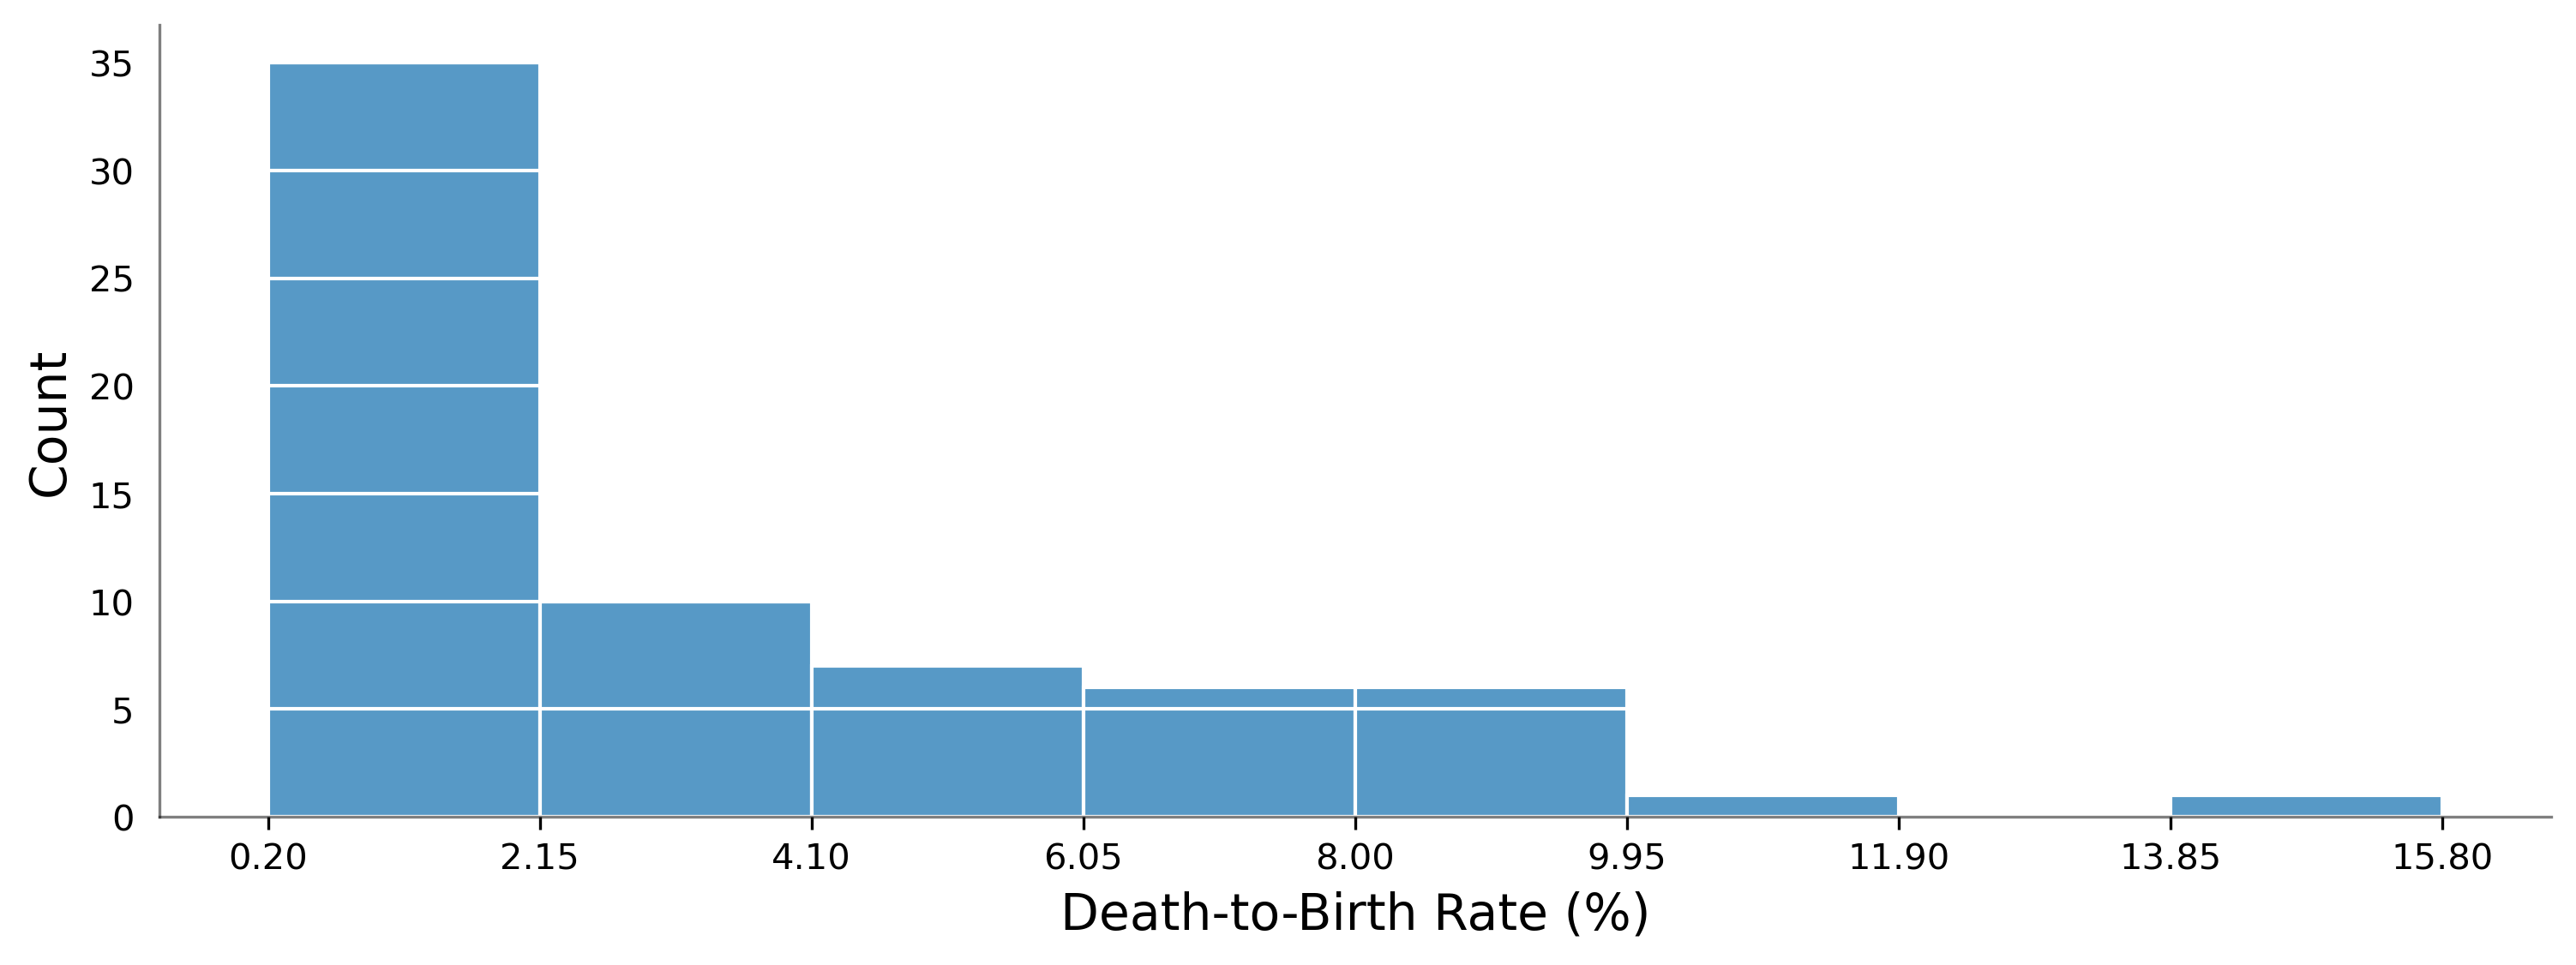

In [51]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram with bins='auto'
histplot = sns.histplot(vienna_df_clean['Rate'], 
                        bins='auto', 
                        edgecolor='white')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Specify x Label and y label
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Additional formatting
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Figure 7.2: Histgoram with modified bins

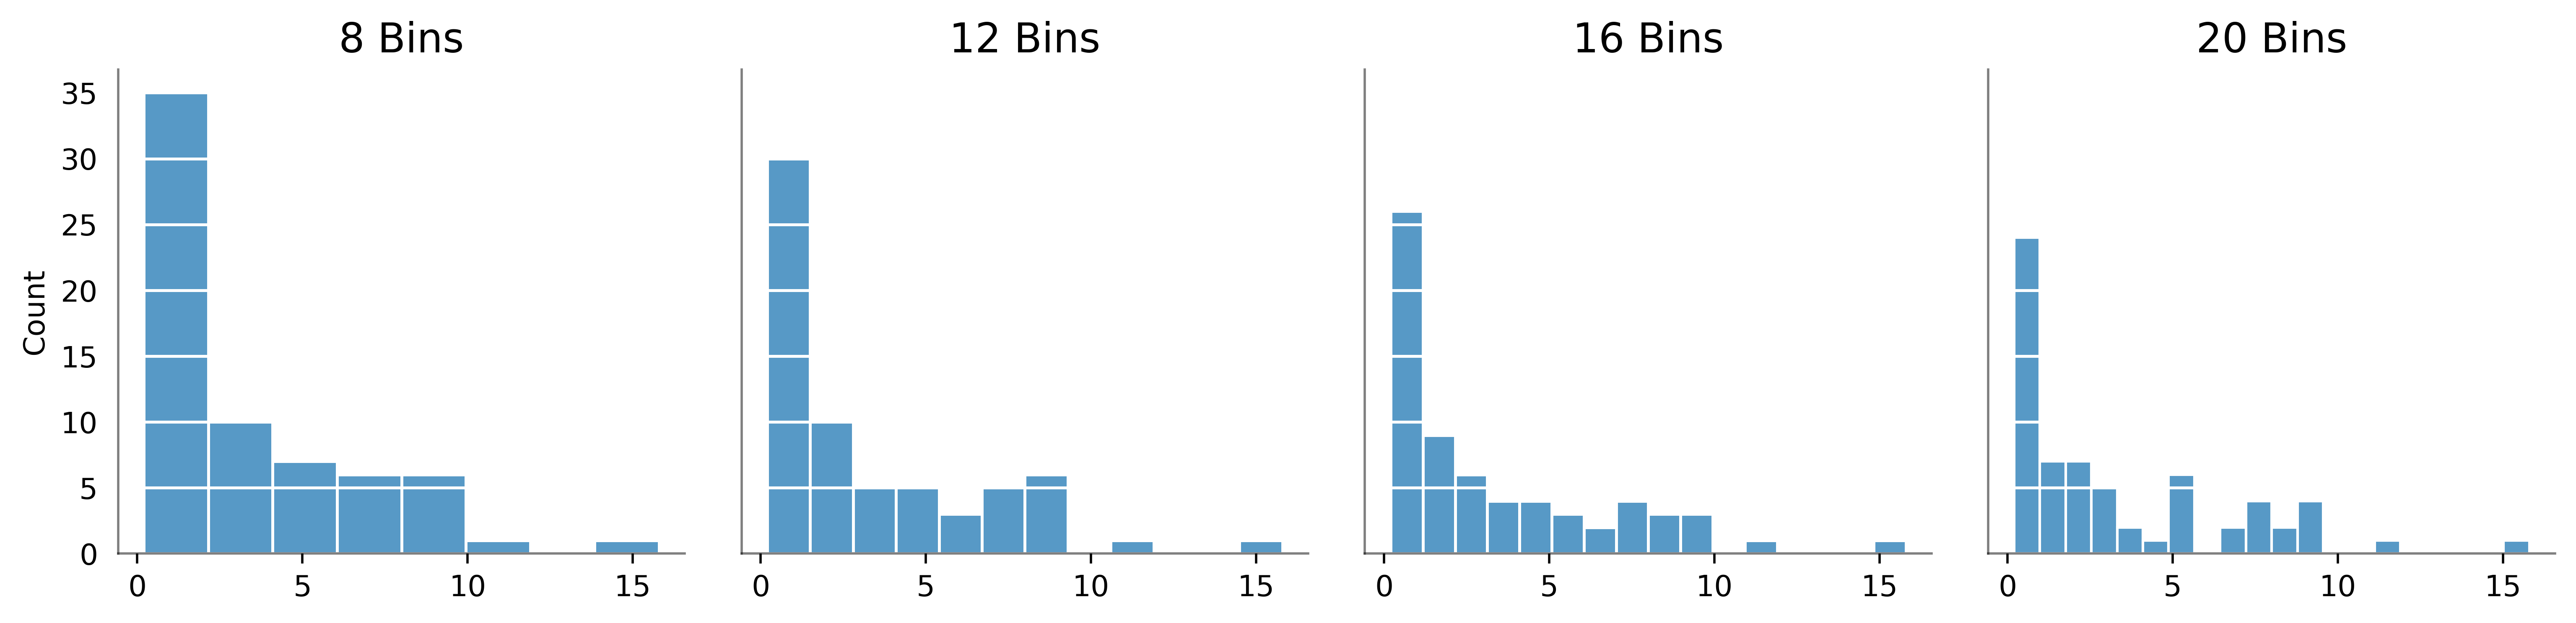

In [52]:
# Create figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3), 
                         sharey=True, dpi=500)
# Adjust white space of subplots
plt.subplots_adjust(wspace=0.1)

# List of bins for each subplot
bins_list = [8, 12, 16, 20]

# Loop over each subplot and bins value
for i, bins in enumerate(bins_list):
    sns.histplot(vienna_df['Rate'], 
                 bins=bins, 
                 ax=axes[i], 
                 edgecolor='white')
    axes[i].set_title(f'{bins} Bins', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].spines[['left','bottom']].set_alpha(0.5)
    # Set the yticks and yticklabels to white
    axes[i].tick_params(axis='y', color='white')
    # Ensure that the y-grid is still visible
    axes[i].yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Despine Figure
sns.despine()

# Show plot
plt.show()

## Figure 7.4: Stem-and-leaf plot

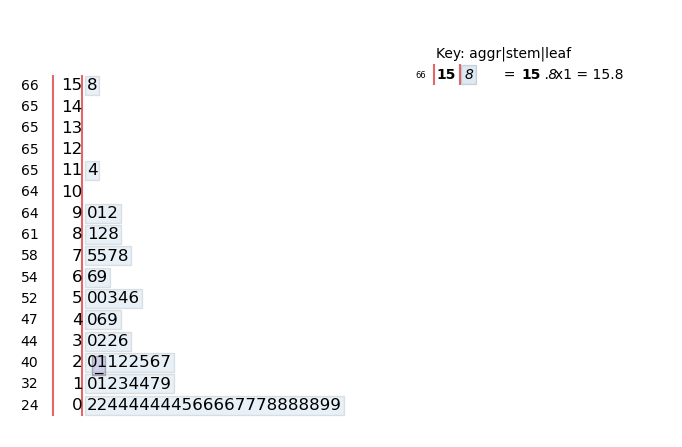

In [53]:
# Create stem and leaf plot of Vienna General ratios
vienna_stem_leaf = stemgraphic.stem_graphic(vienna_df['Rate'])

## Figure 7.5: Histogram of death-to-birth rates with annotations, bins = 16

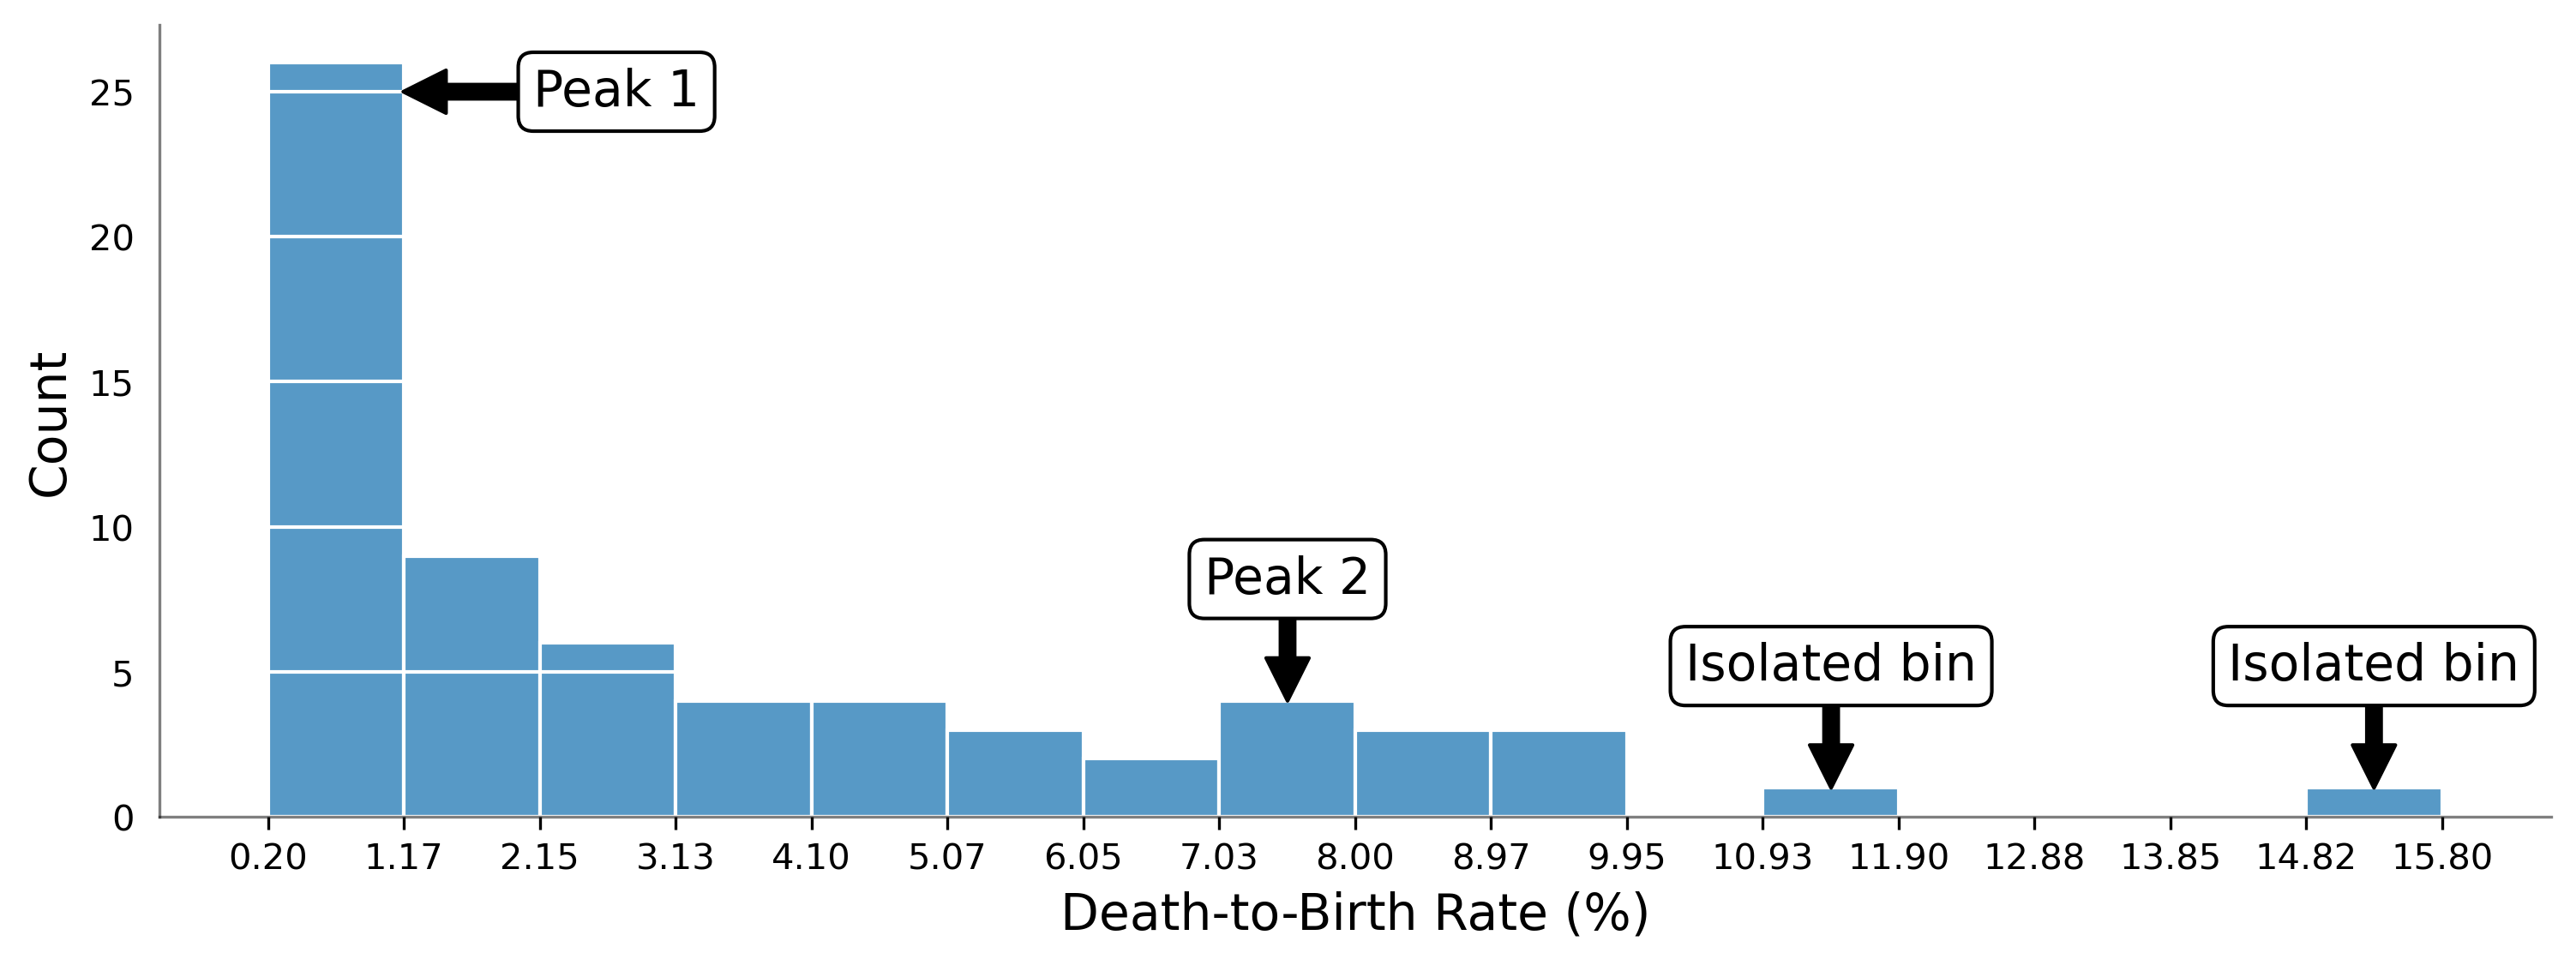

In [54]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram with bins=15
histplot = sns.histplot(vienna_df['Rate'], 
             bins=16, 
             edgecolor='white')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Peak 1', (1.17, 25), (2.7, 25)),
    ('Peak 2', (7.515, 4), (7.515, 8.2)),
    ('Isolated bin', (11.415, 1), (11.415, 5.2)),
    ('Isolated bin', (15.31, 1), (15.31, 5.2))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Formatting
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Despine 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

## Figure 7.6: Histogram of death-to-birth rates at Dublin Maternity Hospital

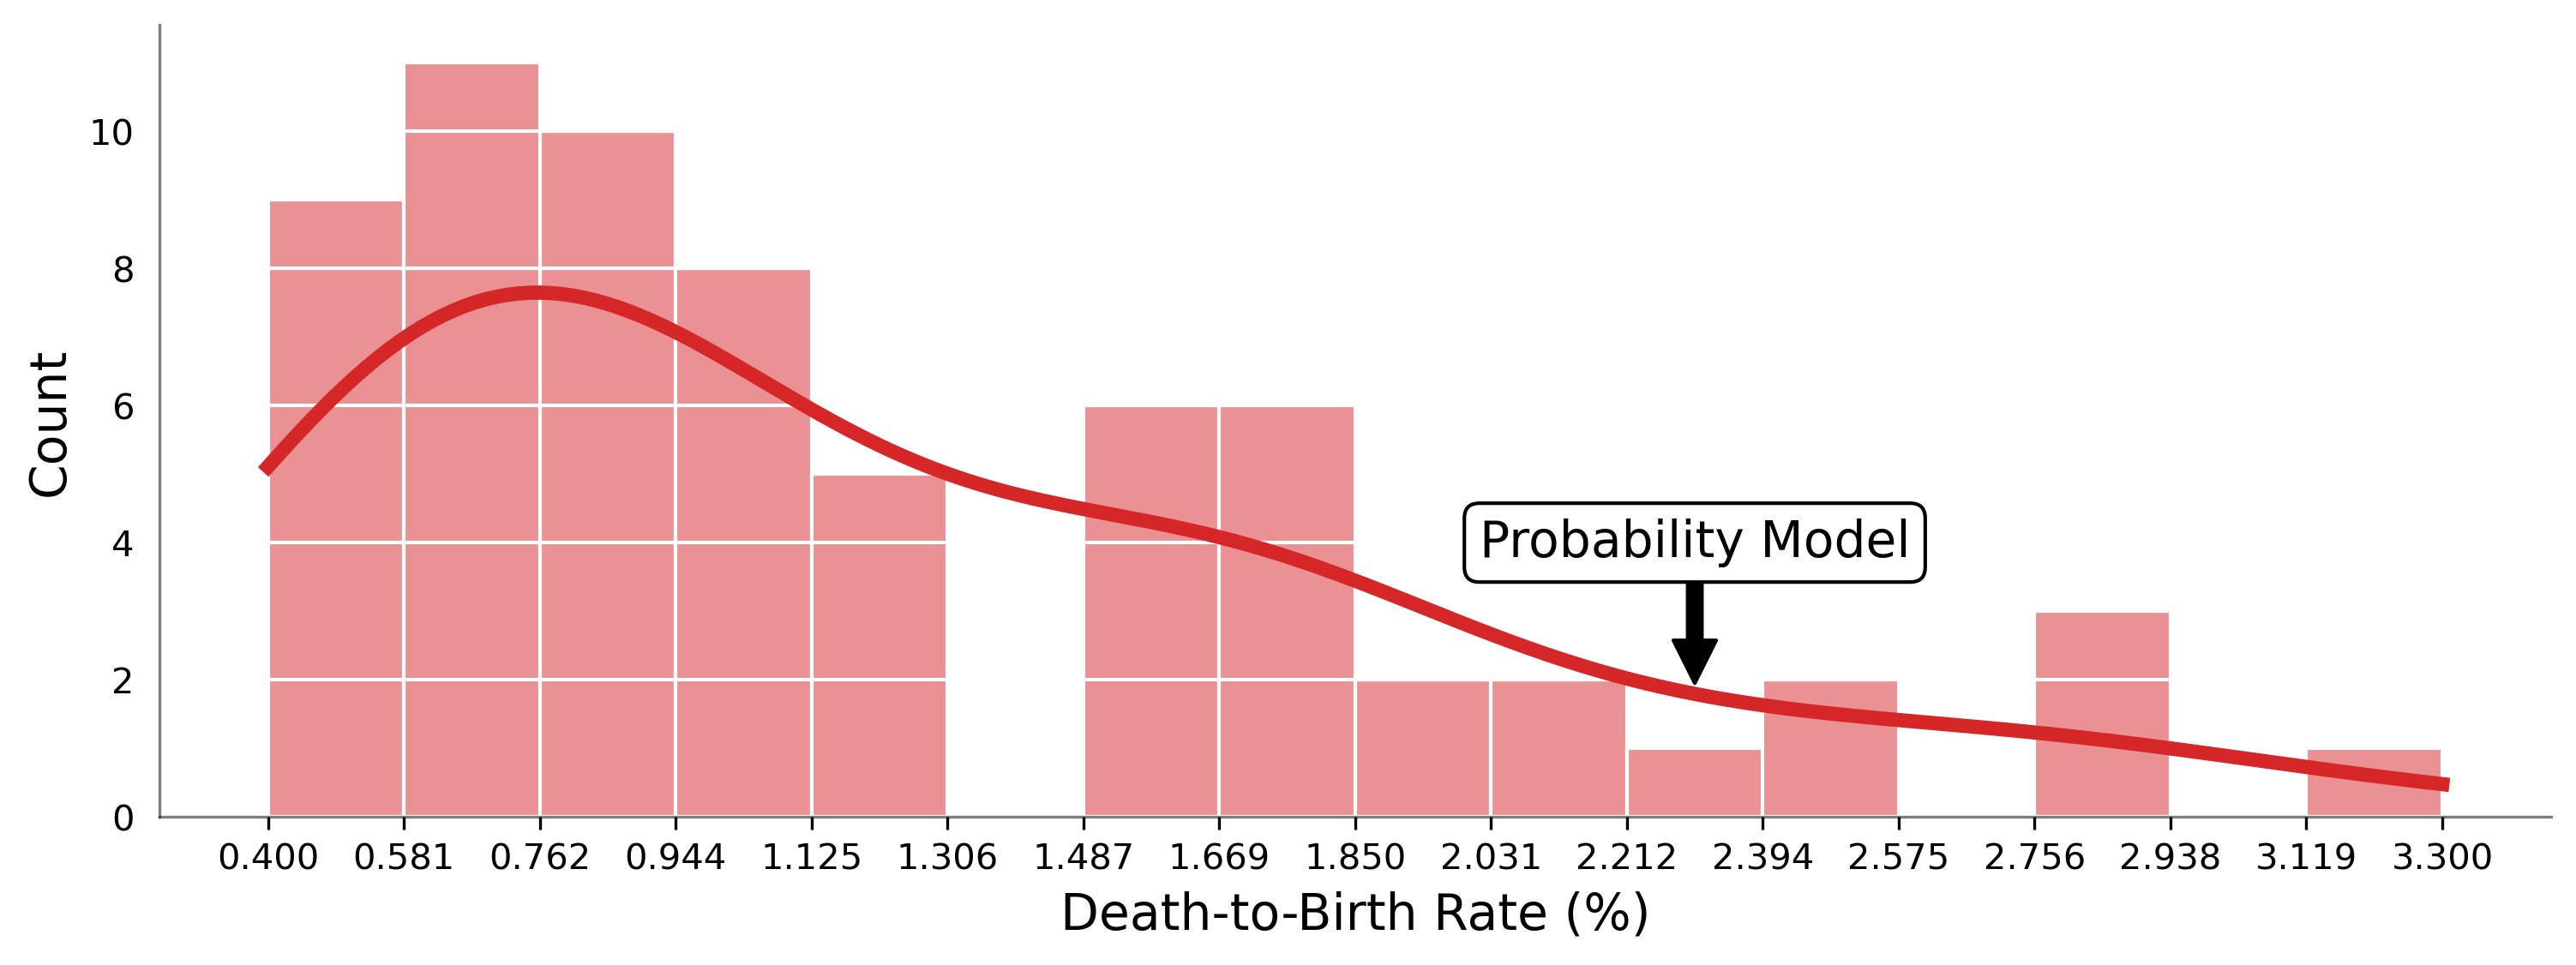

In [55]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram
histplot = sns.histplot(dublin_df['Rate'], 
             bins=16, 
             color='tab:red', 
             edgecolor='white',
             kde=True, 
             legend=True, 
             line_kws={'color': 'red', 
                       'linewidth': 4})

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
# plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

ax.annotate(
    text='Probability Model',  
    xy=(2.303, 1.95),            
    xytext=(2.303, 4),
    ha='center',
    va='center',
    fontsize=14,
    bbox=dict(facecolor='white',boxstyle='round'),
    arrowprops=dict(facecolor='black'))

# Show plot
plt.show()

## Figure 7.7: Histogram comparing the death-to-birth rates at Vienna General Hospital and Dublin Maternity Hospital

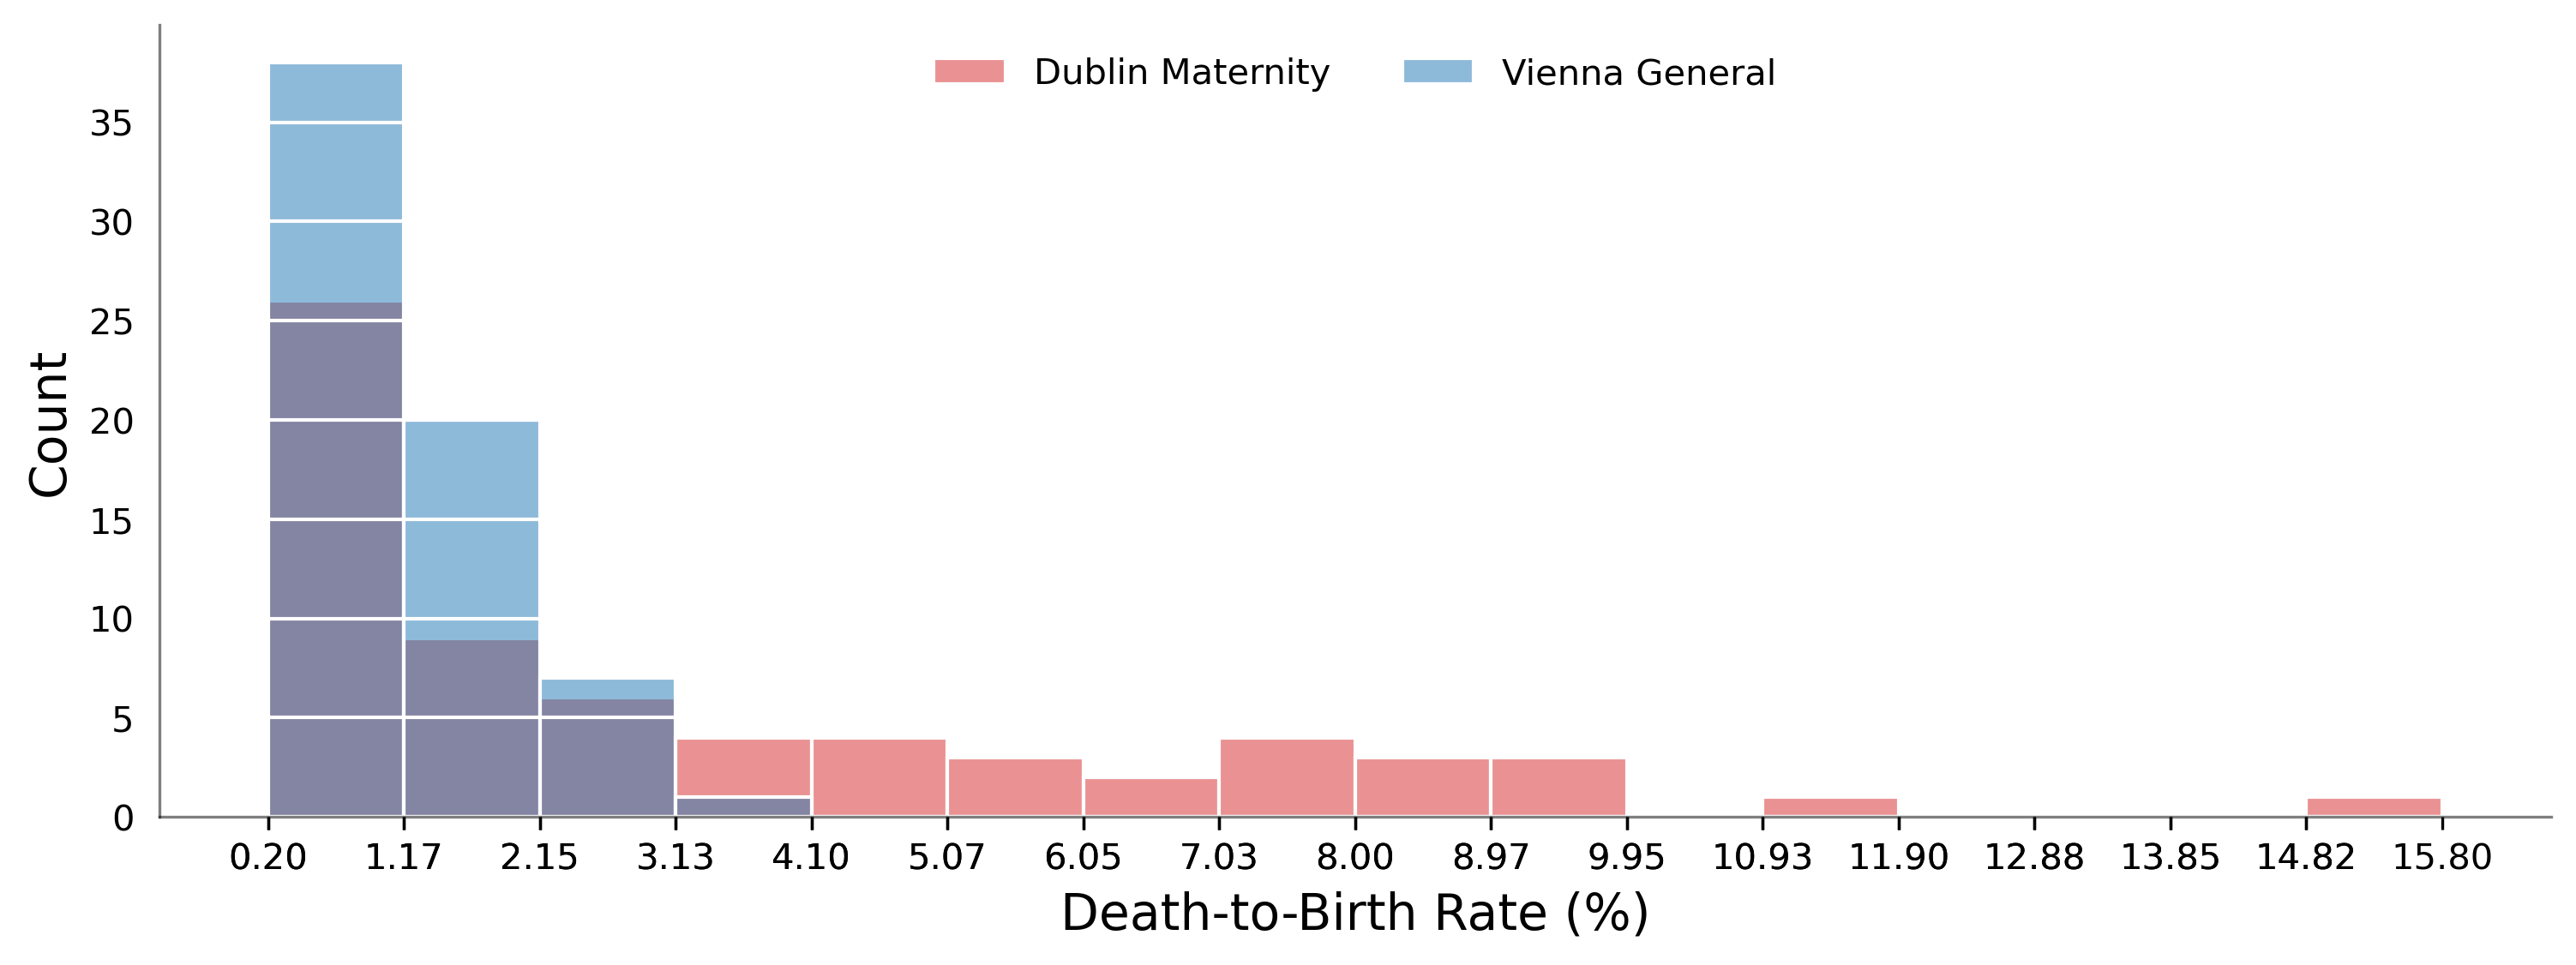

In [64]:
# Suppress warnings
warnings.filterwarnings(
    "ignore",
    message="The default of observed=False is deprecated",
    category=FutureWarning
)
warnings.filterwarnings(
    "ignore",
    message="When grouping with a length-1 list-like",
    category=FutureWarning
)

# Plot data from Vienna General in histogram
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histplot
histplot = sns.histplot(rate_df, 
             x='Rate', 
             hue='Hospital', 
             bins=16, 
             edgecolor='white',
             alpha=0.5, 
             palette=['tab:blue','tab:red'],
             multiple='layer')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Modify the legend
plt.legend(title="", 
           labels=['Dublin Maternity', 'Vienna General'], 
           loc='upper center',
           ncol=2,
           frameon=False)

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)',fontsize=14)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

## Figure 7.8: Histogram of death-to-birth rates at Dublin Maternity Hospital, without probability model

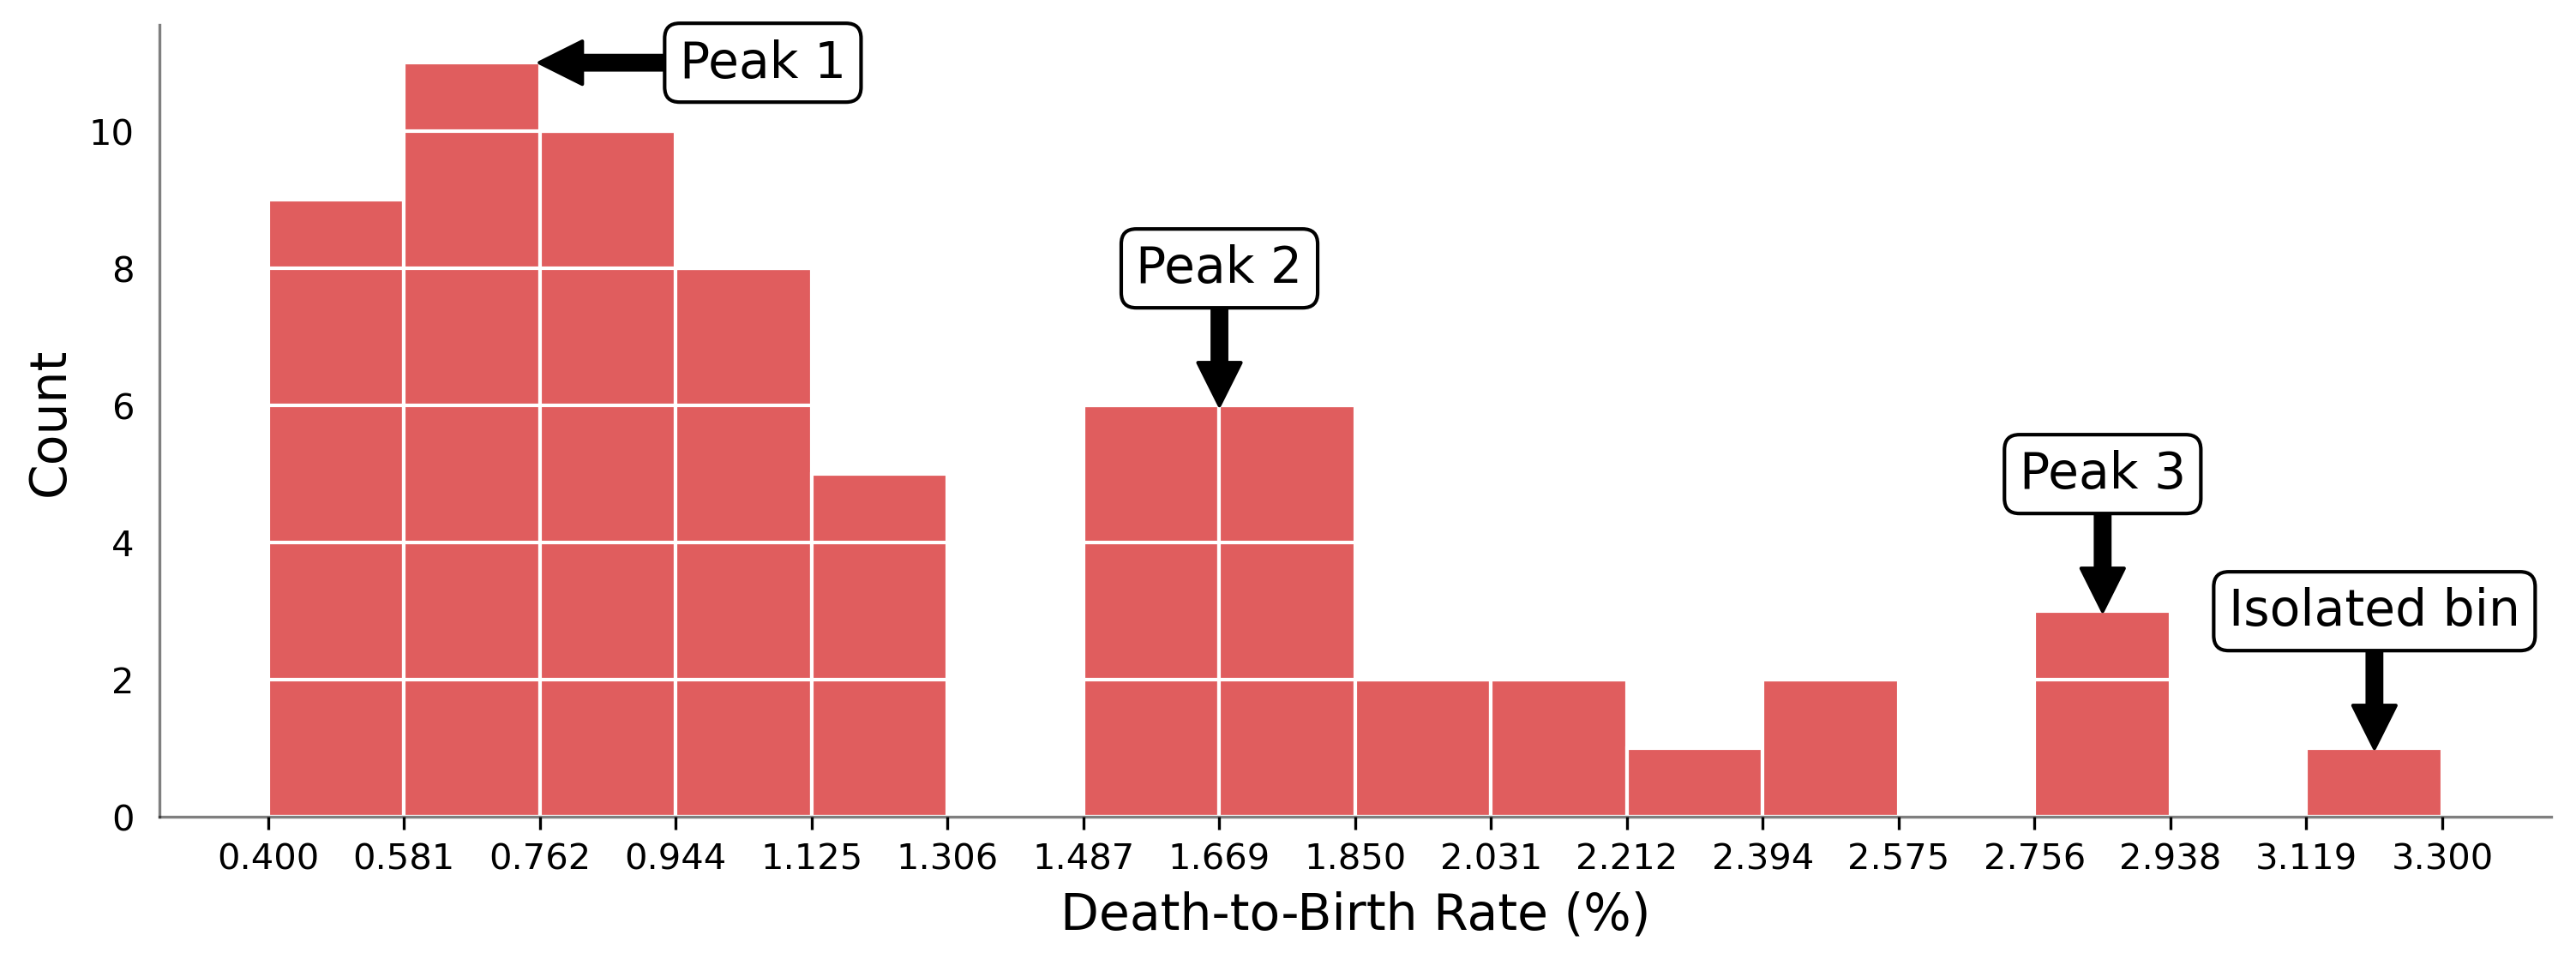

In [65]:
# Plot data from Vienna General in histogram
fig, ax = plt.subplots(figsize=(12,4), dpi=300)
# sns.histplot(dg_df['Rate (%)'], bins=15, color='tab:red', kde=True, legend=True)

# Plot data in histogram
histplot = sns.histplot(dublin_df['Rate'], 
             bins=16, 
             color='tab:red', 
             edgecolor='white') 

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
# plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Peak 1', (0.762, 11), (1.06, 11)),
    ('Peak 2', (1.669, 6), (1.669, 8)),
    ('Peak 3', (2.847, 3), (2.847, 5)),
    ('Isolated bin', (3.2095, 1), (3.2095, 3))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=14,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Show plot
plt.show()